In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


## Now lets take our output histograms and a nominal fast rotation distribution and use it to construct an overall loss probability vs. time

---

### First we get the loss probability histogram

In [2]:
#fin = r.TFile("./data/OutputHist_1234.root")
fin = r.TFile("./data/./OutputHist_123456_900000000_100.root")
fin.ls()
c = fin.Get("c1")
print([x for x in c.GetListOfPrimitives()])
h = c.GetPrimitive("h").Clone("h")
h.SetDirectory(0)
print(h)

[<ROOT.TFrame object ("TFrame") at 0x7fffe3ff2510>, <ROOT.TH2D object ("h") at 0x7fffe4003a00>, <ROOT.TPaveText object ("title") at 0x7fffe40abca0>]
<ROOT.TH2D object ("h") at 0x7fffe41d36c0>
TFile**		./data/./OutputHist_123456_900000000_100.root	
 TFile*		./data/./OutputHist_123456_900000000_100.root	
  KEY: TCanvas	c1;1	c1


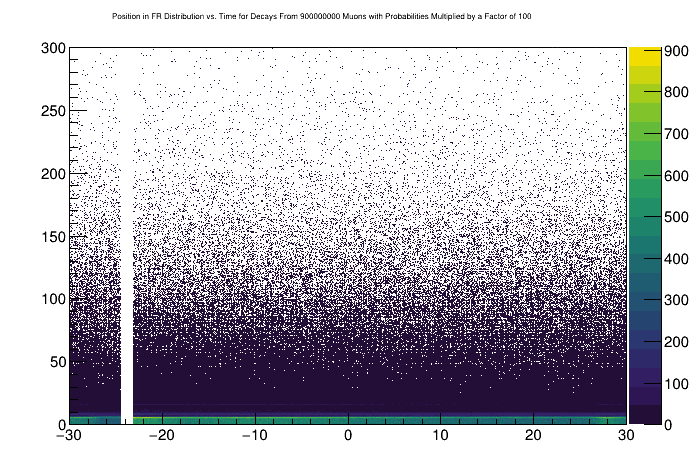

In [3]:
c = r.TCanvas()
print()
h.Draw("colz")
c.Draw()

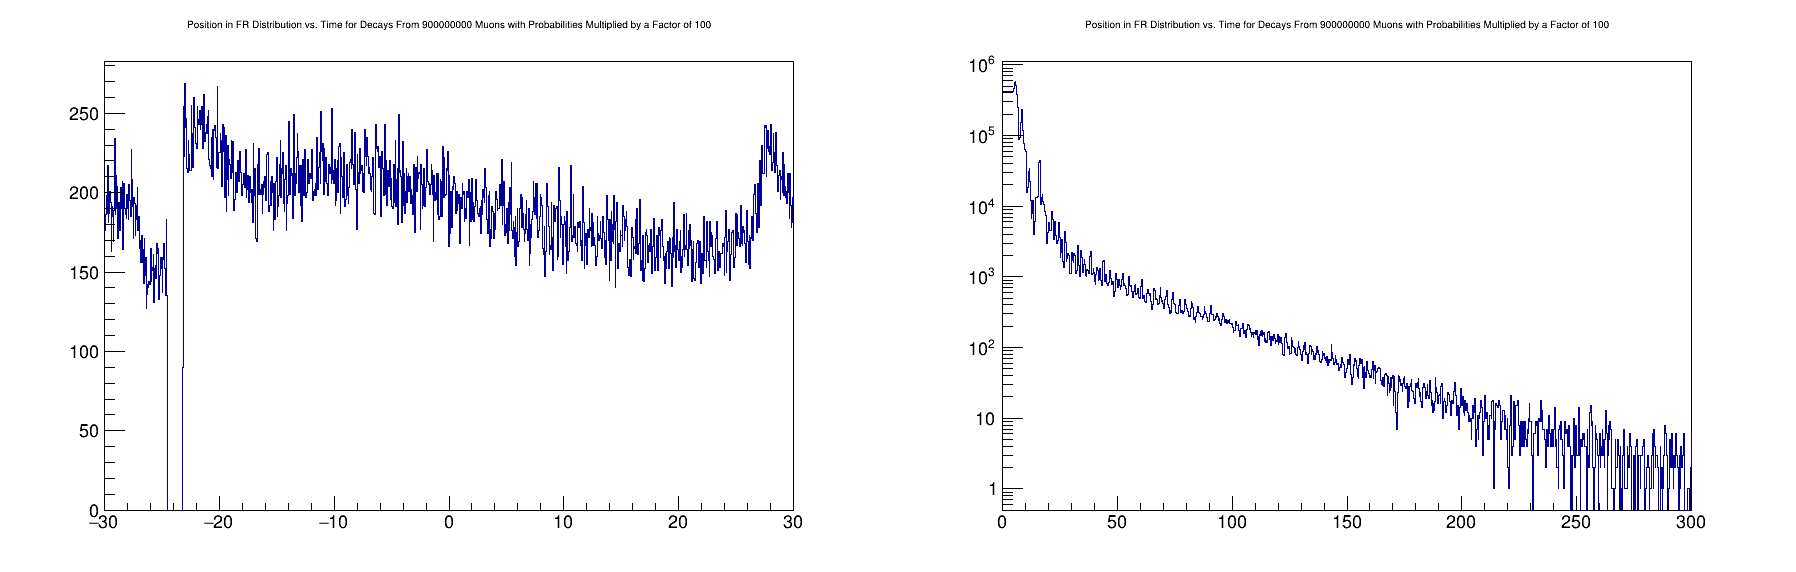

In [4]:
c = r.TCanvas("c","c",1800,600)
c.Divide(2)
c.cd(1)
h.ProjectionX("",100,1500).Draw()
c.cd(2)
h.ProjectionY().Draw()
r.gPad.SetLogy()
c.Draw()

Info in <TCanvas::Print>: png file ./images/Xprof_0100.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_0350.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_0600.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_0850.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_1100.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_1350.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_1600.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_1850.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_2100.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_2350.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_2600.png has been created
Info in <TCanvas::Print>: png file ./images/Xprof_2850.png has been created


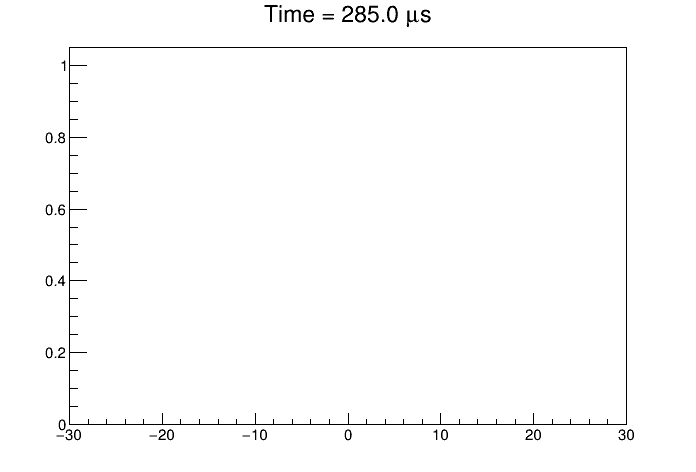

In [30]:
timeBins = 250
os.system("rm -f ./images/Xprof_*png")
for i in range(100,3000,timeBins):
    hi = h.ProjectionX("",i,i+timeBins).Clone()
    c = r.TCanvas()
    hi.SetTitle("Time = "+str(i/10.)+" #mus")
    hi.Draw()
    c.Draw()
    c.Print("./images/Xprof_"+str(i).zfill(4)+".png")

---

### Now we can come up with a loss probability vs. time for various momentum/position slices

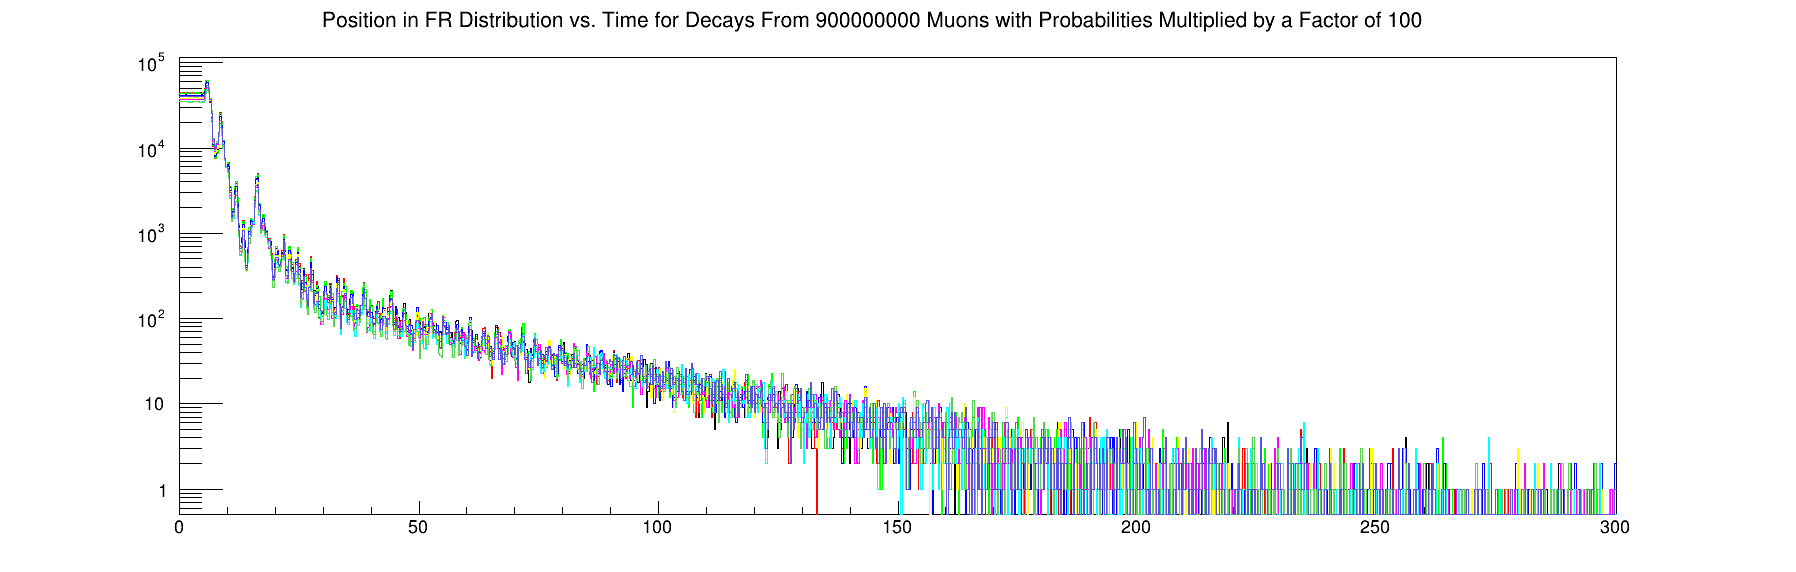

In [13]:
xrange = [-20,30]
nDivs = 10
xbins = np.linspace(xrange[0],xrange[1], nDivs)
c = r.TCanvas("c","c",1800,600)
for i in range(nDivs-1):
    minBin = h.GetXaxis().FindBin(xbins[i])
    maxBin = h.GetXaxis().FindBin(xbins[i+1])
    h.GetXaxis().SetRange(minBin, maxBin)
    h_y = h.ProjectionY("",minBin, maxBin)
    h_y.SetLineColor(i+1)
    if(i<1):
        h_y.DrawCopy()
    else:
        h_y.DrawCopy("same")
c.SetLogy()
c.Draw()

---
### Now lets choose a nominal fast rotation distribution and use that as our reference to extract the loss parameters

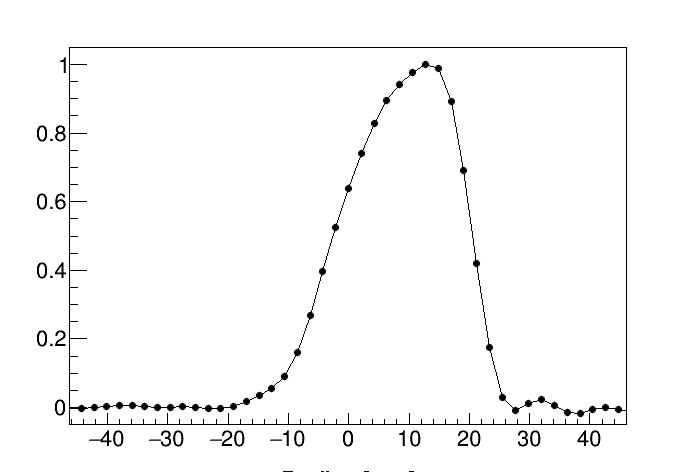

In [18]:
run = 30445 #nominal
run = 30475 #fifth_high
f = r.TFile("./fastRotation/CornellFourier_run"+str(run)+"_results.root")
gri = f.Get("rad")
c = r.TCanvas()
gri.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


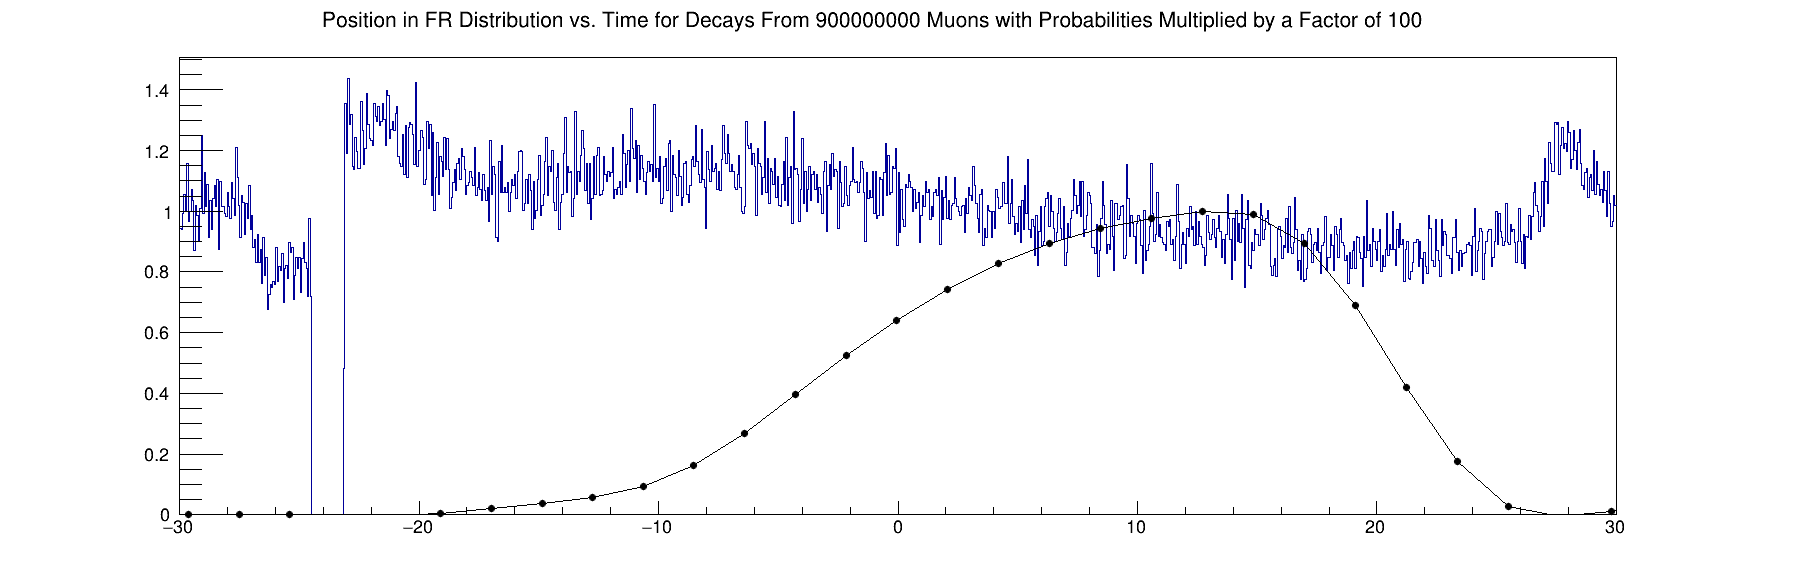

In [24]:
c = r.TCanvas("c","c",1800,600)
h.GetXaxis().UnZoom()
hscale = h.ProjectionX("",100,1500).Clone("hscale")
hscale.Scale(1/hscale.Integral()*1000)
hscale.Draw("hist")
gri.Draw("SAME pl")
c.Draw()

---

### Now lets convolve them. We can weight the contents of the h histogram by the amplitude of the FR distribution

We will treat points <= 0 as having no muons for now. This will be fixed by just getting a better FR distribution later

In [26]:
h_fr = h.Clone("h_fr")
h_fr.Reset()
h_fr.SetDirectory(0)

fr_dict = {}

for binx in range(0,h.GetNbinsX()+2):
    center = h.GetXaxis().GetBinCenter(binx)
    fr_amplitude = gri.Eval(center)
    if(fr_amplitude > 0):
        fr_dict[binx] = fr_amplitude
    else:
        fr_dict[binx] = 0
    #print(center, fr_amplitude)
    
#print(fr_dict)
for binx in range(0,h.GetNbinsX()+2):
    for biny in range(0, h.GetNbinsY()+2):
        content = h.GetBinContent(binx, biny)
        if(content > 0):
            newContent = content*fr_dict[binx]
            h_fr.SetBinContent(binx,biny,newContent)
            #print(binx, biny, content, fr_dict[binx], newContent)

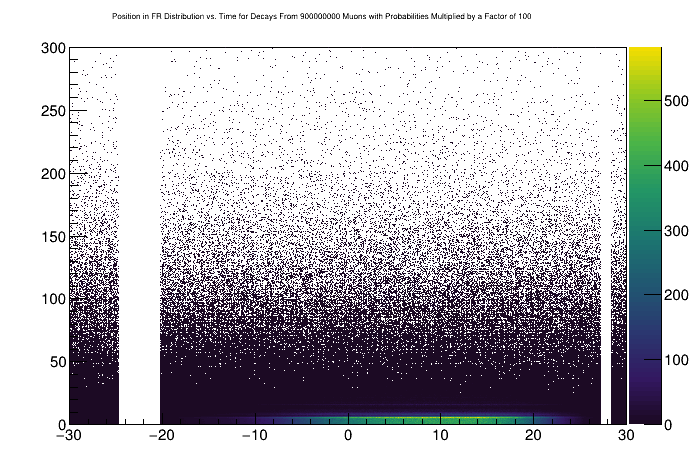

In [27]:
c = r.TCanvas()
h_fr.Draw("colz")
c.Draw()

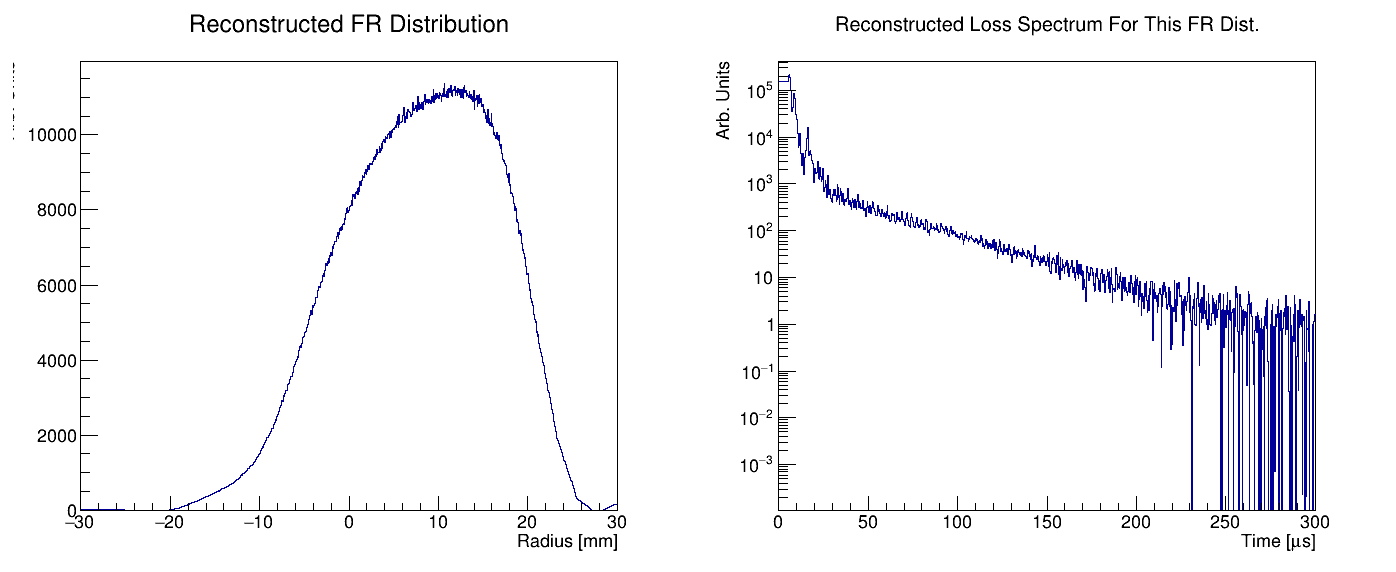

In [28]:
c = r.TCanvas("c","c",1400,600)
c.Divide(2)
c.cd(1)
h_fr_x = h_fr.ProjectionX().Clone()
h_fr_x.SetDirectory(0)
h_fr_x.SetTitle("Reconstructed FR Distribution; Radius [mm]; Arb. Units")
h_fr_x.Draw("colz")
c.cd(2)
h_fr_y = h_fr.ProjectionY().Clone()
h_fr_y.SetDirectory(0)
h_fr_y.SetTitle("Reconstructed Loss Spectrum For This FR Dist.; Time [#mus]; Arb. Units")
h_fr_y.Draw("colz")
r.gPad.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


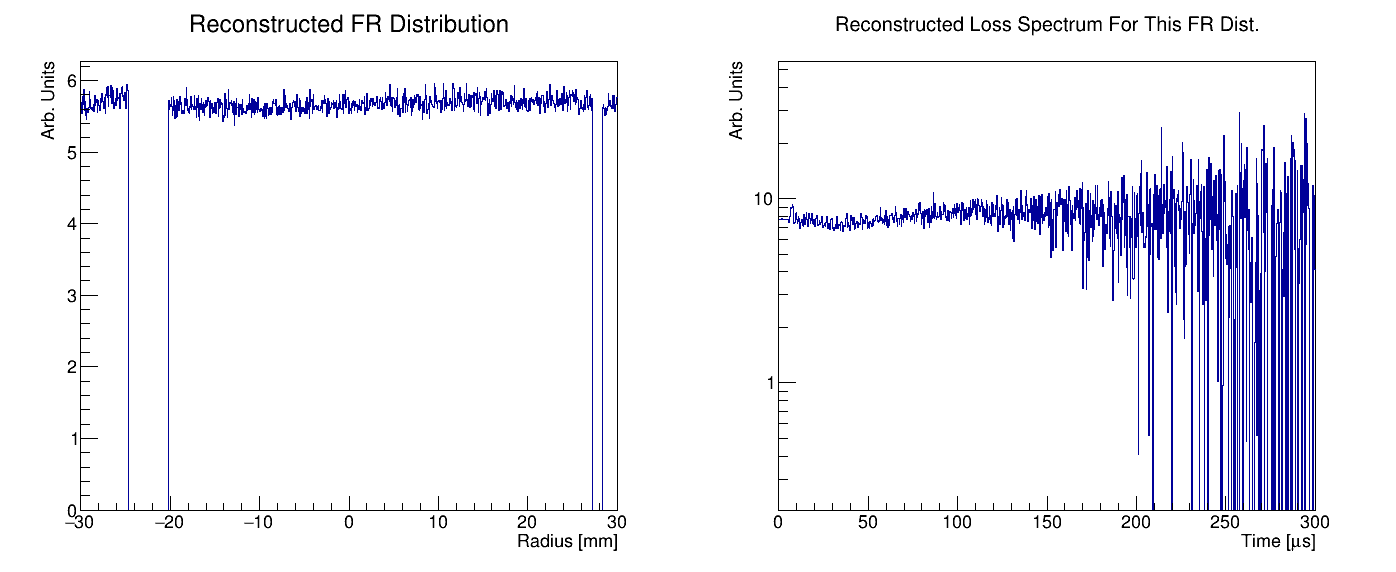

In [29]:
c = r.TCanvas("c","c",1400,600)
c.Divide(2)
c.cd(1)
h_fr_x2 = h_fr.ProfileX().Clone()
h_fr_x2.SetDirectory(0)
h_fr_x2.SetTitle("Reconstructed FR Distribution; Radius [mm]; Arb. Units")
h_fr_x2.Draw("hist colz")
c.cd(2)
h_fr_y2 = h_fr.ProfileY().Clone()
h_fr_y2.SetDirectory(0)
h_fr_y2.SetTitle("Reconstructed Loss Spectrum For This FR Dist.; Time [#mus]; Arb. Units")
h_fr_y2.Draw("hist colz")
r.gPad.SetLogy()
c.Draw()

In [30]:
f_ref = r.TFile("./muonLoss/results_fifthCtag_highMomentum.root")
h_tripi = f_ref.Get("CoincidenceFinderLM/clusterTimecaloNumtriple_").Clone("h_tripi")
h_tripi.SetDirectory(0)
h_tripi.SetLineColor(2)

h_trip = r.TH3D()
h_tripi.Copy(h_trip)
h_trip.SetDirectory(0)


h_sing = f_ref.Get("CoincidenceFinderLM/clusterTimecaloNumsingle_").Clone("h_sing")
#h_sing = f.Get("nearlineCTag").Clone("h_sing")
h_sing.SetDirectory(0)
#ctag =  h_sing.Project3D("y").Integral(h_sing.GetYaxis().FindBin(24000), -1)
ctag =  h_sing.Project3D("y").Integral(h_sing.GetYaxis().FindBin(24000), -1)
#print(ctag)
f.Close()

h_trip.Scale(1/ctag)
print(h_sing, h_trip)


h_trip_y = h_trip.ProjectionY().Clone("h_trip_y")
h_trip_y.SetDirectory(0)

<ROOT.TH3I object ("h_sing") at 0x7fffe78c35a0> <ROOT.TH3D object ("h_tripi") at 0x7fffe7b59700>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


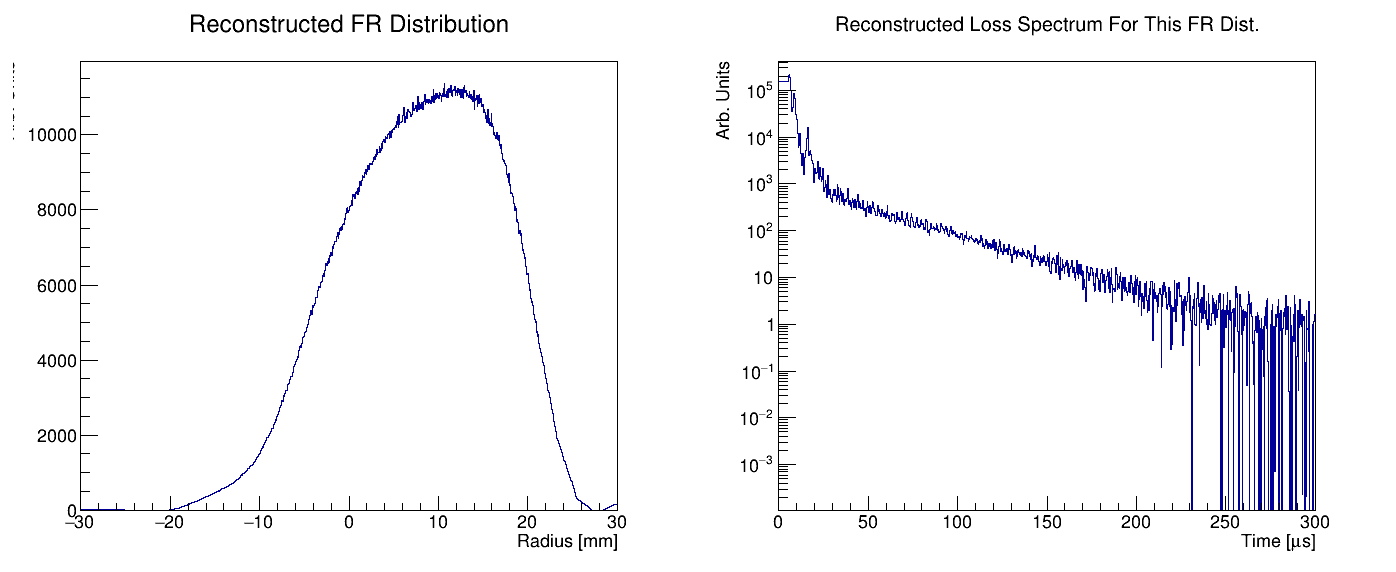

In [31]:
c = r.TCanvas("c","c",1400,600)
c.Divide(2)
c.cd(1)
h_fr_x = h_fr.ProjectionX().Clone()
h_fr_x.SetDirectory(0)
h_fr_x.SetTitle("Reconstructed FR Distribution; Radius [mm]; Arb. Units")
h_fr_x.Draw("colz")
c.cd(2)
h_fr_y = h_fr.ProjectionY().Clone()
h_fr_y.SetDirectory(0)
h_fr_y.SetTitle("Reconstructed Loss Spectrum For This FR Dist.; Time [#mus]; Arb. Units")
h_fr_y.Draw("colz")
r.gPad.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


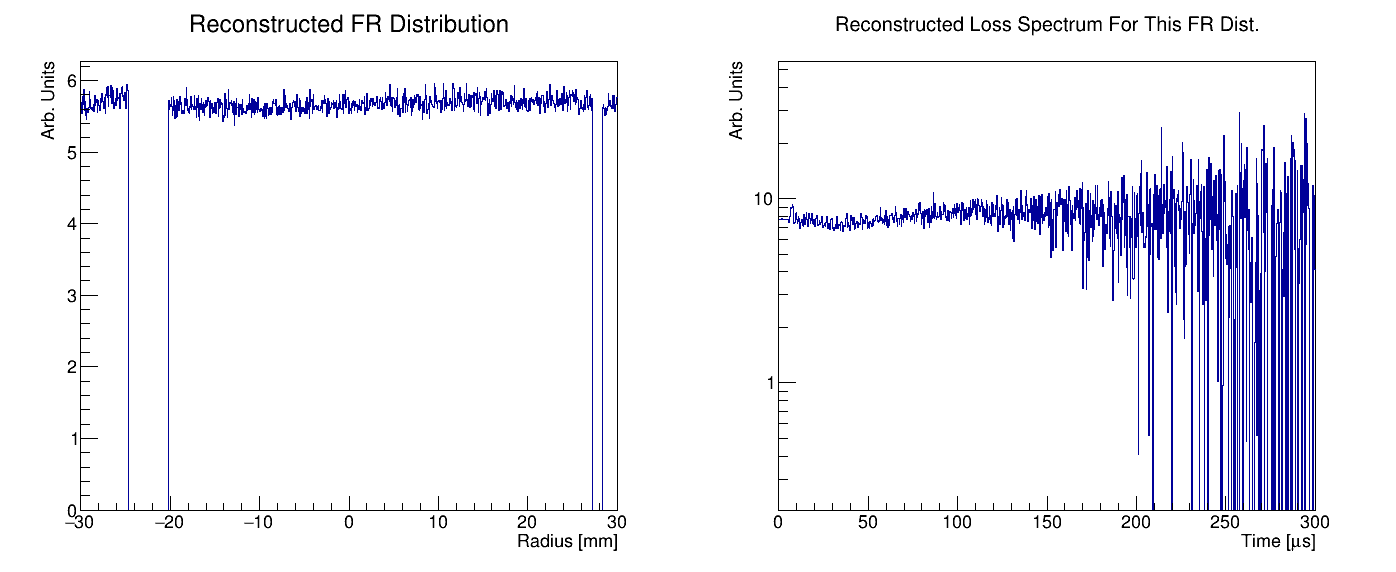

In [32]:
c = r.TCanvas("c","c",1400,600)
c.Divide(2)
c.cd(1)
h_fr_x2 = h_fr.ProfileX().Clone()
h_fr_x2.SetDirectory(0)
h_fr_x2.SetTitle("Reconstructed FR Distribution; Radius [mm]; Arb. Units")
h_fr_x2.Draw("hist colz")
c.cd(2)
h_fr_y2 = h_fr.ProfileY().Clone()
h_fr_y2.SetDirectory(0)
h_fr_y2.SetTitle("Reconstructed Loss Spectrum For This FR Dist.; Time [#mus]; Arb. Units")
h_fr_y2.Draw("hist colz")
r.gPad.SetLogy()
c.Draw()

In [33]:
hists = [h_fr_y, h_trip_y]
print(hists)
for hi in hists:
    hi.SetDirectory(0)

[<ROOT.TH1D object ("h_fr_py") at 0x7fffe136e690>, <ROOT.TH1D object ("h_trip_y") at 0x7fffe7888e90>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


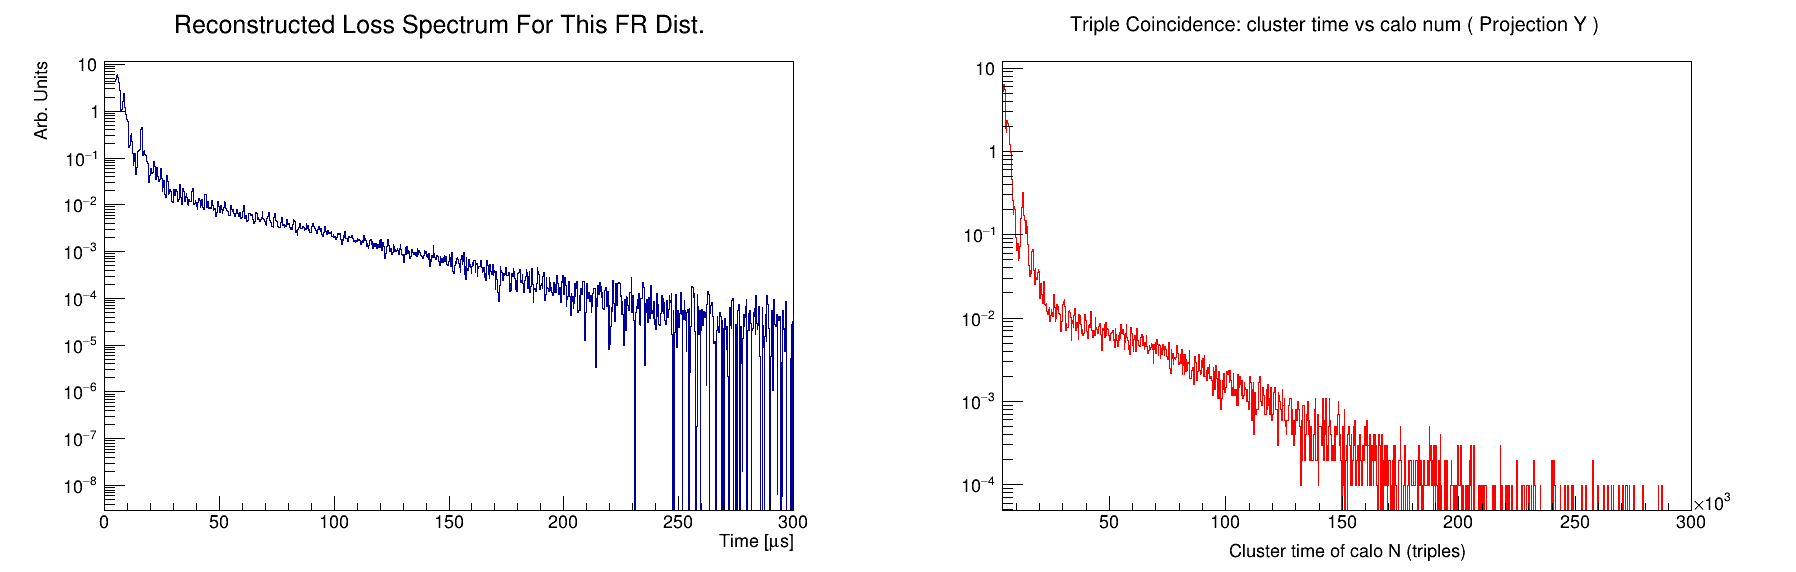

In [34]:
c = r.TCanvas("c","c",1800,600)
c.Divide(2)
c.cd(1)
hists[0].GetYaxis().SetRangeUser(0.1,1000000)
hists[0].Scale(1/(hists[0].Integral( hists[0].FindBin(50), hists[0].FindBin(150) )))
hists[0].Draw("hist")
r.gPad.SetLogy()
c.cd(2)
hists[1].Draw("hist")
hists[1].Scale(1/(hists[1].Integral( hists[1].FindBin(50*1000./1.25), hists[1].FindBin(150*1000./1.25) )))


r.gPad.SetLogy()
c.Draw()

In [35]:
ding = TH1ToNumpyArray(hists[0])
#print(ding)

In [36]:
ding2 = TH1ToNumpyArray(hists[1])
ding2 = [ [x/1000.*1.25 for x in ding2[0]], ding2[1], ding2[2] ]
#print(ding2)

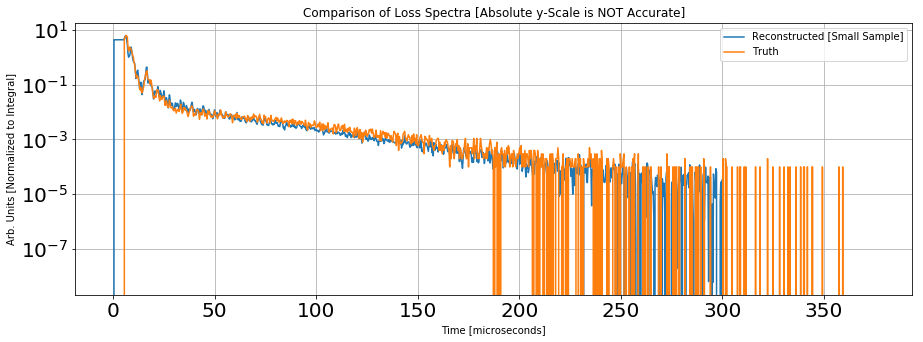

In [37]:
fig,ax = plt.subplots(figsize=(15,5))
plt.title("Comparison of Loss Spectra [Absolute y-Scale is NOT Accurate]")
plt.xlabel("Time [microseconds]")
plt.ylabel("Arb. Units [Normalized to Integral]")

plt.plot(ding[0], ding[1], label="Reconstructed [Small Sample]")
plt.plot(ding2[0], ding2[1], label="Truth")

plt.yscale('log')
#plt.ylim(0.1,70000)
#plt.xlim(0,40)

plt.grid()
plt.legend()
plt.show()

---

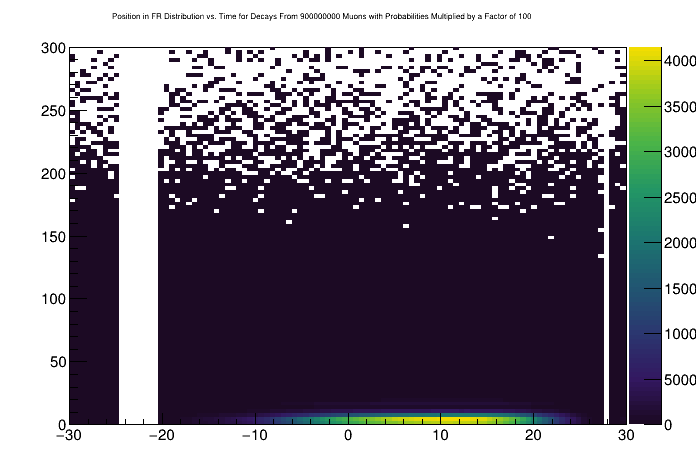

In [38]:
c = r.TCanvas()
h_fr.Draw("colz")
h_fr.Rebin2D(10,10)
c.Draw()

[100, 100]


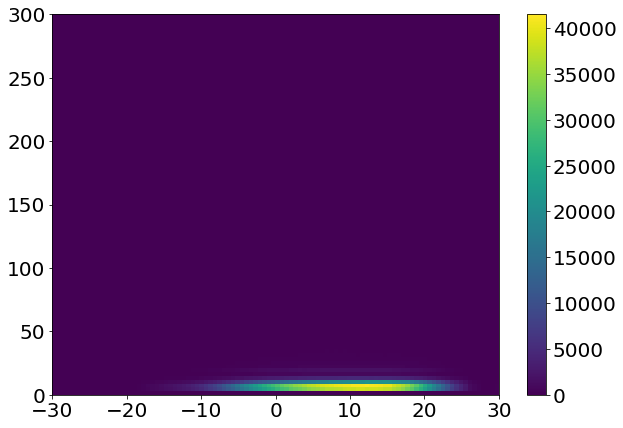

In [39]:
fig,ax = plt.subplots(figsize=(10,7))
ding, histarray = TH2ToNumpyArray(h_fr)
#print(ding)
#plt.imshow(ding)
plt.colorbar()
plt.show()